In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
RESULT_BASE_PATH = '../results'
onlyfiles = [f for f in listdir(RESULT_BASE_PATH) if isfile(join(RESULT_BASE_PATH, f))]
onlyfiles

['10.txt',
 'bubble_10.txt',
 'bubble_int.txt',
 'bubble_reverse.txt',
 'bubble_sorted.txt',
 'builtin_10.txt',
 'builtin_int.txt',
 'builtin_reverse.txt',
 'builtin_sorted.txt',
 'digitsort_10.txt',
 'digitsort_int.txt',
 'digitsort_reverse.txt',
 'digitsort_sorted.txt',
 'fsort_10.txt',
 'fsort_int.txt',
 'fsort_reverse.txt',
 'fsort_sorted.txt',
 'heap_10.txt',
 'heap_int.txt',
 'heap_reverse.txt',
 'heap_sorted.txt',
 'insertion_10.txt',
 'insertion_int.txt',
 'insertion_reverse.txt',
 'insertion_sorted.txt',
 'int.txt',
 'merge_10.txt',
 'merge_int.txt',
 'merge_reverse.txt',
 'merge_sorted.txt',
 'myqsort_10.txt',
 'myqsort_int.txt',
 'myqsort_reverse.txt',
 'myqsort_sorted.txt',
 'reverse.txt',
 'shell_10.txt',
 'shell_int.txt',
 'shell_reverse.txt',
 'shell_sorted.txt',
 'sorted.txt']

In [4]:
FAST_NAMES = ['builtin', 'digitsort', 'fsort', 'heap', 'merge', 'myqsort']
SLOW_NAMES = ['shell', 'insertion', 'bubble']

In [5]:
def filter_names(input_list, keyword):
    return [x for x in input_list if f'_{keyword}' in x]

In [6]:
filter_names(onlyfiles, 'int')

['bubble_int.txt',
 'builtin_int.txt',
 'digitsort_int.txt',
 'fsort_int.txt',
 'heap_int.txt',
 'insertion_int.txt',
 'merge_int.txt',
 'myqsort_int.txt',
 'shell_int.txt']

In [7]:
with open('../results/'+onlyfiles[0]) as f:
    print(f.read())

16 62500 0.635744
32 31250 2.30413
64 15625 7.98534
128 7812 25.346
256 3906 78.1498
512 1953 257.059
1024 976 895.282
2048 488 3238.03
4096 244 12908.1
8192 200 60230.5
16384 200 357819
32768 200 2.02856e+06



In [8]:
onlyfiles[1][:-4]

'bubble_10'

In [9]:
from collections import namedtuple
Datarow = namedtuple("Datarow", 'size, iters, time')

In [10]:
def load_data(input_list):
    res = {}
    for filename in input_list:
        with open(join(RESULT_BASE_PATH, filename)) as f:
            content = f.read()
            splits = [a.strip().split() for a in content.strip().split('\n')]
            x = [Datarow(int(a), int(b), float(c)) for (a,b,c) in splits]
            res[filename.split('_', 1)[0]] = x
    return res

In [11]:
data = load_data(filter_names(onlyfiles, 'int'))
data

{'bubble': [Datarow(size=16, iters=62500, time=0.69648),
  Datarow(size=32, iters=31250, time=2.5688),
  Datarow(size=64, iters=15625, time=8.63936),
  Datarow(size=128, iters=7812, time=27.9421),
  Datarow(size=256, iters=3906, time=88.1513),
  Datarow(size=512, iters=1953, time=292.638),
  Datarow(size=1024, iters=976, time=1026.67),
  Datarow(size=2048, iters=488, time=3746.94),
  Datarow(size=4096, iters=244, time=14892.9),
  Datarow(size=8192, iters=200, time=68804.9),
  Datarow(size=16384, iters=200, time=382870.0),
  Datarow(size=32768, iters=200, time=2085430.0)],
 'builtin': [Datarow(size=16, iters=62500, time=0.252048),
  Datarow(size=32, iters=31250, time=0.840128),
  Datarow(size=64, iters=15625, time=1.96838),
  Datarow(size=128, iters=7812, time=4.93113),
  Datarow(size=256, iters=3906, time=10.8756),
  Datarow(size=512, iters=1953, time=24.2002),
  Datarow(size=1024, iters=1000, time=52.503),
  Datarow(size=2048, iters=1000, time=118.501),
  Datarow(size=4096, iters=1000

In [12]:
def draw_graph(data, scaling='log', limit=None, savename=None):
    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=160)

    labels = []
    for (key, values) in data.items():
        X = []
        Y = []
        for datarow in values:
            X+=[datarow.size]
            Y+=[datarow.time/1e3]
        label_text, = plt.plot(X,Y, label=key)
        labels += [label_text]
    plt.xscale('log', base=2)
    if limit is not None:
        plt.ylim(0, limit)
    plt.yscale(scaling)
    plt.legend(handles=labels)
    if savename is not None:
        plt.savefig(savename)
    plt.show()

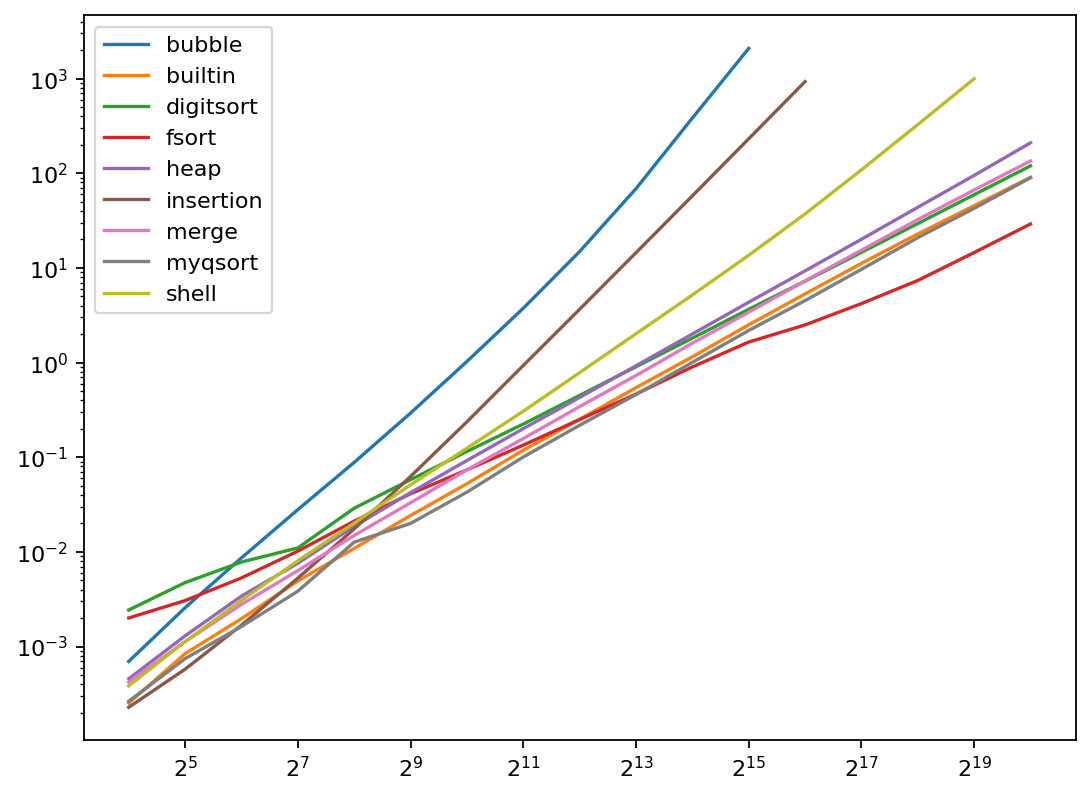

In [13]:
draw_graph(data)

In [14]:
def make_plots(keyword, savename=None):
    RESULT_BASE_PATH = '../results'
    onlyfiles = [f for f in listdir(RESULT_BASE_PATH) if isfile(join(RESULT_BASE_PATH, f))]
    data = load_data(filter_names(onlyfiles, keyword))
    draw_graph(data, savename=savename)

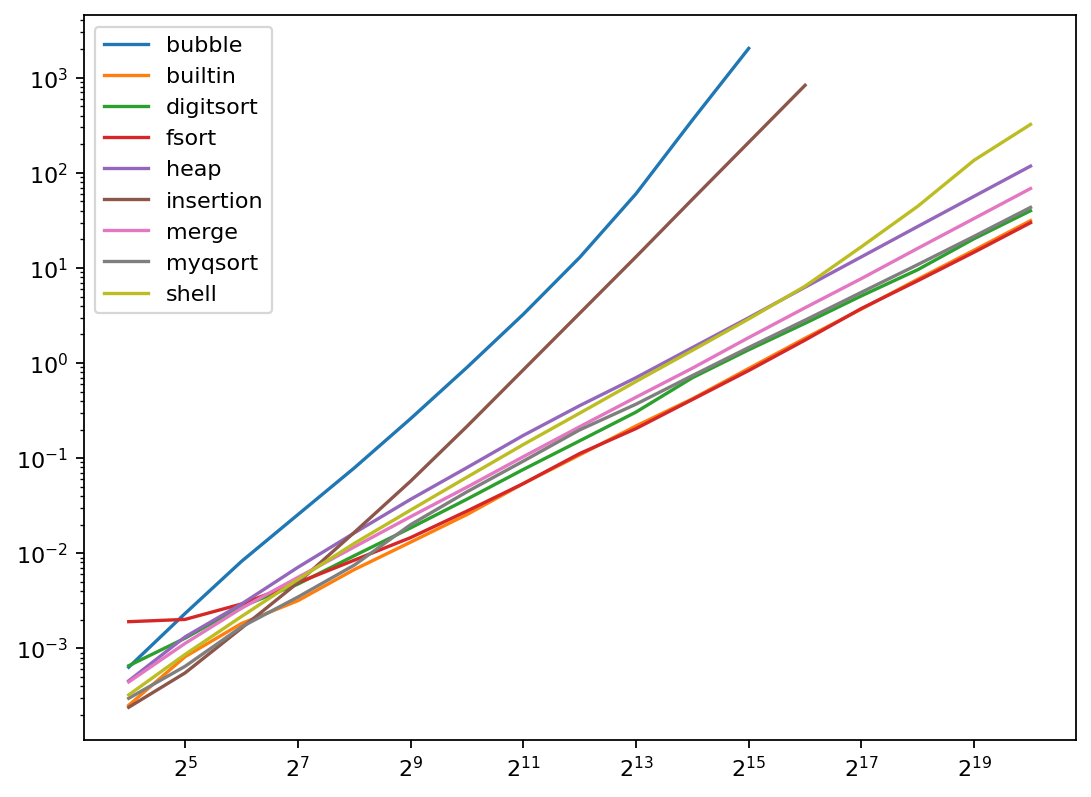

In [15]:
make_plots('10')

In [16]:
SLOW_NAMES = ['bubble', 'insertion', 'shell']
def graph_slow_sorts(keyword, savename=None):
    RESULT_BASE_PATH = '../results'
    onlyfiles = [f for f in listdir(RESULT_BASE_PATH) if isfile(join(RESULT_BASE_PATH, f))]
    data = load_data(filter_names(onlyfiles, keyword))
    data = {k:v for k,v in data.items() if k in SLOW_NAMES}
    draw_graph(data, scaling='log', savename=savename)
    
def graph_fast_sorts(keyword, savename=None):
    RESULT_BASE_PATH = '../results'
    onlyfiles = [f for f in listdir(RESULT_BASE_PATH) if isfile(join(RESULT_BASE_PATH, f))]
    data = load_data(filter_names(onlyfiles, keyword))
    data = {k:v for k,v in data.items() if k not in SLOW_NAMES}
    draw_graph(data, scaling='log', savename=savename)

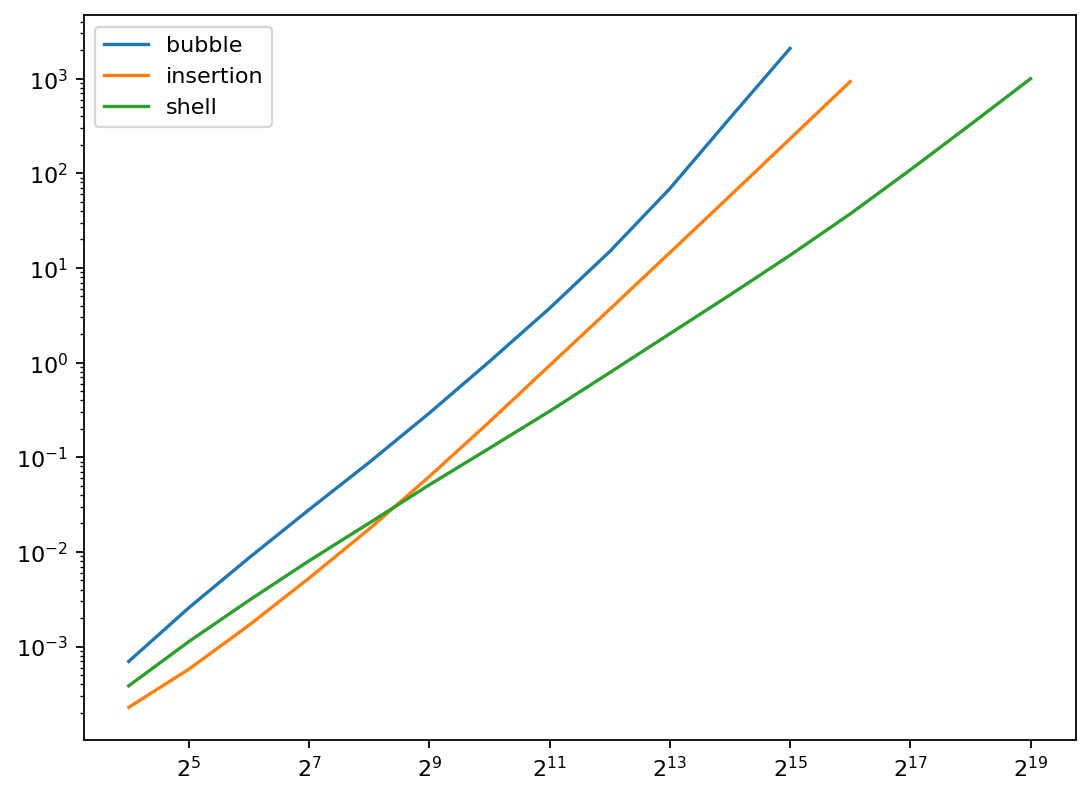

In [17]:
graph_slow_sorts('int', savename='slow.png')

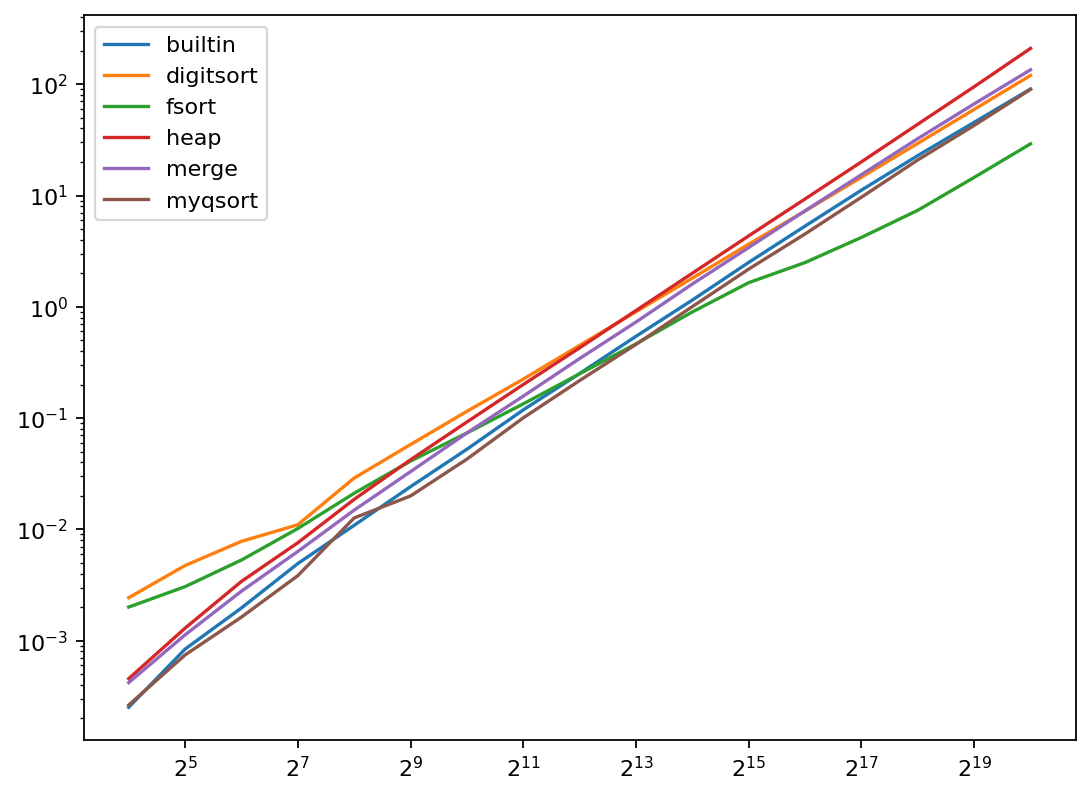

In [18]:
graph_fast_sorts('int', savename='fast.png')

(array([7., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   899.472 ,  39096.5248,  77293.5776, 115490.6304, 153687.6832,
        191884.736 , 230081.7888, 268278.8416, 306475.8944, 344672.9472,
        382870.    ]),
 <BarContainer object of 10 artists>)

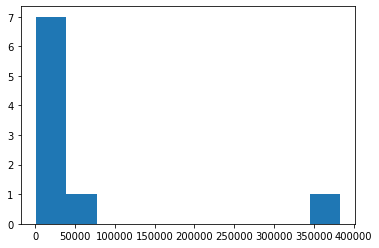

In [19]:
plt.hist([v[10].time for k,v in data.items()])

In [20]:
[v[10].time for k,v in data.items()]

[382870.0,
 1149.5,
 1810.51,
 899.472,
 2003.29,
 57687.4,
 1602.56,
 1004.07,
 5180.38]

время для определённого размера

In [21]:
def bar_sorts(keyword, savename, size_power=20, names=FAST_NAMES, title=None):
    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=160)

    RESULT_BASE_PATH = '../results'
    onlyfiles = [f for f in listdir(RESULT_BASE_PATH) if isfile(join(RESULT_BASE_PATH, f))]
    data = load_data(filter_names(onlyfiles, keyword))
    data = {k:v for k,v in data.items() if k in names}

    SIZE = 1<<size_power
    print(SIZE)

    labels = []
    Y = []
    for (key, values) in data.items():

        value = [x for x in values if x.size==SIZE][0]

        Y+=[value.time/1e3]
        labels += [key]

    plt.bar(labels, Y)
    title = title or f'скорость сортировок (числа, 2^{size_power} элементов)'
    plt.title(title)

    plt.xlabel('метод сортировки')
    plt.ylabel('время работы, мс')
    if savename is not None:
        plt.savefig(savename)
    plt.show()

1048576


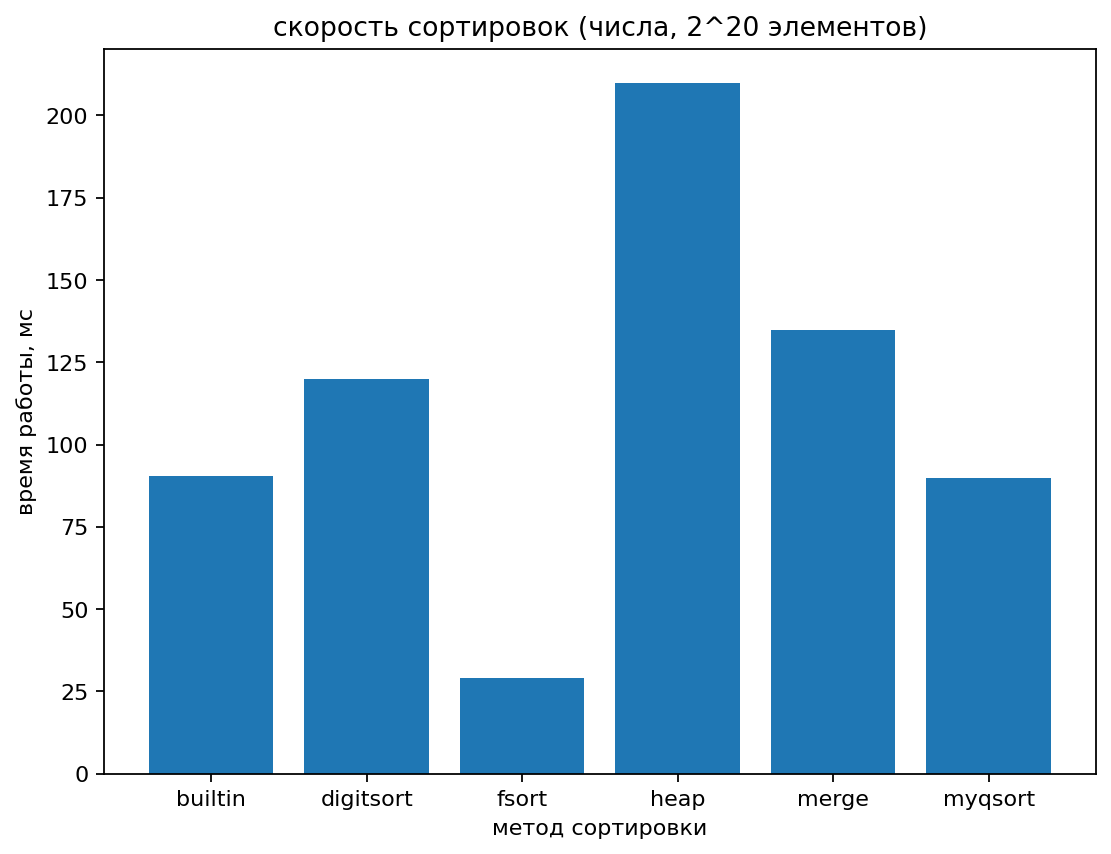

In [22]:
bar_sorts('int', 'fast_int_bars.png', names=FAST_NAMES)

1048576


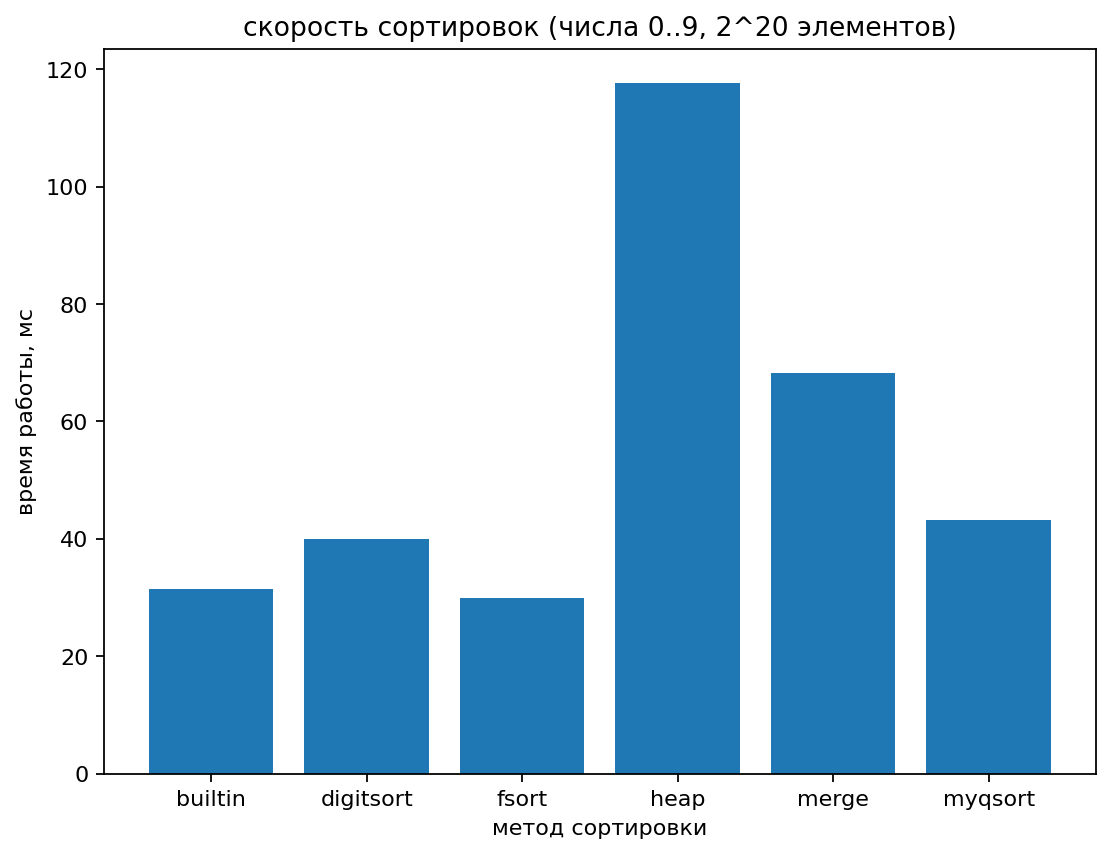

In [23]:
bar_sorts('10', 'fast_10_bars.png', title='скорость сортировок (числа 0..9, 2^20 элементов)')